# Visualization: Trading Session

In [1]:
import pandas as pd
import numpy as np

import altair as alt
import seaborn as sns

alt.data_transformers.enable('csv')

model_name = "models/newmt/week_2025-01-25_XL_MAS_MIN_LOSS" # seems like if we train too much, we end up overtraining. 0.5 loss works pretty well.
test_stock = "data/NQ1-1m-DATA-BY-WEEK/week_2025-01-25.csv" # _INVERSE

window_size = 30
debug = False

model_name = model_name.replace('models/', '')

In [6]:
from trading_bot.agent import Agent

agent = Agent(window_size, pretrained=True, model_name=model_name)

agent.learning_rate = agent.learning_rate

# read csv into dataframe
df = pd.read_csv(test_stock)
# filter out the desired features
df = df[['Date', 'Adj Close']]
# rename feature column names
df = df.rename(columns={'Adj Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates

import logging
import coloredlogs

from trading_bot.utils import show_eval_result, switch_k_backend_device, get_stock_data
from trading_bot.methods import evaluate_model
from eval_and_train import main

print("HELLO")

coloredlogs.install() # level='DEBUG'
switch_k_backend_device()

test_data = get_stock_data(test_stock)

test_data = test_data[:int(len(test_data)/5)] # train data
# test_data = test_data[int(len(test_data)/5):] # non-train data

initial_offset = test_data[1][3] - test_data[0][3]

# test_result, history, wins, losses, total_trades, mwls = main(test_stock, window_size, model_name, True,
#         data_preload, data_preload_inv)

test_result, history, wins, losses, total_trades, mwls = evaluate_model(agent, test_data, window_size, debug, window_size)
show_eval_result(model_name, test_result, initial_offset)
total_profit = test_result
ec = mwls[3]
print("TOTAL PROFIT: ", total_profit)
print("WINS: ", wins)
print("LOSSES: ", losses)
print("TOTAL TRADES: ", total_trades)
print("LONGEST LOSS STREAK: ", mwls[1])
print("LONGEST WIN STREAK: ", mwls[0])
print("MAX DRAWDOWN: ", mwls[2])
print("EQUITY CURVE: ", mwls[3])
print("Longs: ", mwls[4])
print("Shorts: ", mwls[5])

def visualize(df, history, title="trading session"):
    # add history to dataframe
    position = [history[0][0][3]] + [x[0][3] for x in history]
    actions = ['HOLD'] + [x[1] for x in history]
    df['position'] = position
    df['action'] = actions

    action2 = [x[1] for x in history]


    # specify y-axis scale for stock prices
    scale = alt.Scale(domain=(min(min(df['actual']), min(df['position'])) - 50, max(max(df['actual']), max(df['position'])) + 50), clamp=True)

    # plot a line chart for stock positions
    actual = alt.Chart(df).mark_line(
        color='green',
        opacity=0.5
    ).encode(
        x='date:T',
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale)
    ).interactive(
        bind_y=False
    )
    
    # plot the BUY and SELL actions as points
    points = alt.Chart(df).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action'
    ).interactive(bind_y=False)

    # merge the two charts
    chart = alt.layer(actual, points, title=title).properties(height=300, width=1000)
    
    return chart

def get_ec(data_name, window_size, model_name, debug):
    model_name = model_name.replace('models/', '')
    test_data = get_stock_data(data_name)
    agent2 = Agent(window_size, pretrained=True, model_name=model_name)
    test_result, history, wins, losses, total_trades, mwls = evaluate_model(agent2, test_data, window_size, debug, window_size)
    return mwls[3]


HELLO
HELLO


 94%|█████████▎| 1246/1331 [00:01<00:00, 829.38it/s]
2025-01-27 15:36:04 DESKTOP-A40P0U8 root[9468] INFO newmt/week_2025-01-25_XL_MAS_MIN_LOSS: +$6225.00



TOTAL PROFIT:  6225
WINS:  480
LOSSES:  729
TOTAL TRADES:  1209
LONGEST LOSS STREAK:  59
LONGEST WIN STREAK:  17
MAX DRAWDOWN:  -3450
EQUITY CURVE:  [50, 100, 150, 200, 250, 225, 200, 175, 225, 275, 250, 225, 200, 250, 225, 200, 250, 225, 275, 325, 300, 350, 400, 450, 500, 550, 600, 650, 625, 675, 725, 700, 675, 725, 775, 750, 725, 775, 825, 800, 850, 900, 950, 925, 900, 950, 1000, 1050, 1025, 1000, 975, 1025, 1000, 1050, 1100, 1075, 1050, 1100, 1075, 1050, 1025, 1075, 1050, 1025, 1000, 975, 1025, 1000, 1050, 1025, 1000, 1050, 1025, 1000, 975, 1025, 1075, 1125, 1175, 1225, 1275, 1250, 1225, 1275, 1250, 1225, 1200, 1250, 1225, 1200, 1175, 1225, 1275, 1325, 1300, 1350, 1325, 1375, 1350, 1325, 1300, 1275, 1250, 1225, 1200, 1175, 1150, 1125, 1100, 1075, 1125, 1100, 1150, 1200, 1250, 1300, 1275, 1325, 1375, 1350, 1400, 1450, 1500, 1550, 1525, 1500, 1550, 1525, 1500, 1550, 1525, 1500, 1475, 1450, 1425, 1400, 1375, 1350, 1325, 1300, 1275, 1250, 1225, 1200, 1250, 1300, 1275, 1250, 1225, 1200, 

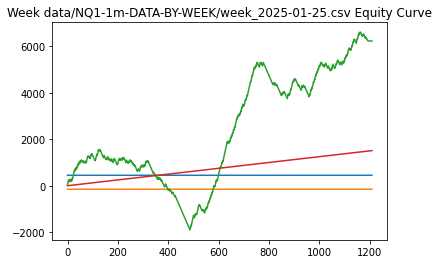

In [3]:
# TESTED EQUITY CURVE

import matplotlib.pyplot as plt

ys = ec.copy()
ys = ys
xs = [x for x in range(len(ys))]

tp = [450 for x in range(len(ys))]
sl = [-150 for x in range(len(ys))]
cost_per_trade = [1.25 * x for x in range(len(ys))]

plt.title("Week {} Equity Curve".format(test_stock))
plt.plot(xs, tp)
plt.plot(xs, sl)
plt.plot(xs, ys)
plt.plot(xs, cost_per_trade)
plt.show()
# Make sure to close the plt object once done
plt.close()

In [4]:
chart = visualize(df, history, title=test_stock)
chart

ValueError: Length of values does not match length of index

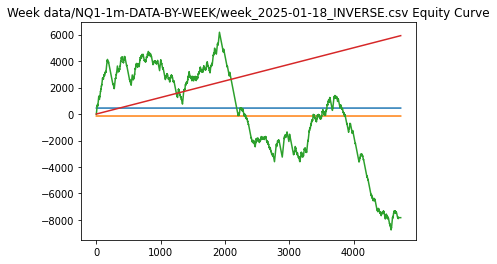

In [25]:
# TESTED EQUITY CURVE

import matplotlib.pyplot as plt

ys = ec.copy()
xs = [x for x in range(len(ys))]

tp = [450 for x in range(len(ys))]
sl = [-150 for x in range(len(ys))]
cost_per_trade = [1.25 * x for x in range(len(ys))]

plt.title("Week {} Equity Curve".format(test_stock))
plt.plot(xs, tp)
plt.plot(xs, sl)
plt.plot(xs, ys)
plt.plot(xs, cost_per_trade)
plt.show()
# Make sure to close the plt object once done
plt.close()

In [26]:
raise

RuntimeError: No active exception to reraise

In [5]:
# wt1 = get_ec('data/NQ1-1m-DATA-BY-WEEK/week_2024-10-26.csv', window_size, 'models/week_2024-10-19_MERGERTRAIN_34', debug)


In [48]:
from pathlib import Path
import datetime
def get_bump_num(num):
    p = 'models/LN_TRAIN/'
    data_p = 'data/NQ1-1m-DATA-BY-WEEK/'
    mtt = {}
    names = [p + str(f.name) for f in Path(p).iterdir() if f.is_file()]
    for i in Path(p).iterdir():
        if f"BUMP{num}" in i.name and f"BUMP{num}0" not in i.name:
            print(i.name)
            wnum = str(i.name.split("_")[1].replace("week_", ""))
            do = datetime.datetime.strptime(wnum, '%Y-%m-%d')
            do2 = do + datetime.timedelta(weeks=1)
            test_data = "week_" + do2.strftime('%Y-%m-%d') + ".csv"
            mtt[do.strftime('%Y-%m-%d')] = [p + i.name, data_p + test_data]

    dl = [get_ec(mtt[i][1], window_size, mtt[i][0], debug) for i in list(mtt.keys())]
    return dl

bump1 = get_bump_num(1)
bump2 = get_bump_num(2)
bump3 = get_bump_num(3)
bump4 = get_bump_num(4)
bump5 = get_bump_num(5)
bump6 = get_bump_num(6)



week_2024-09-28_XL_MAS_BUMP1
week_2024-10-05_XL_MAS_BUMP1
week_2024-10-12_XL_MAS_BUMP1
week_2024-10-19_XL_MAS_BUMP1
week_2024-10-26_XL_MAS_BUMP1
week_2024-11-02_XL_MAS_BUMP1
week_2024-11-09_XL_MAS_BUMP1
week_2024-11-16_XL_MAS_BUMP1
week_2024-11-23_XL_MAS_BUMP1
week_2024-12-07_XL_MAS_BUMP1
week_2024-12-21_XL_MAS_BUMP1
week_2025-01-04_XL_MAS_BUMP1



































  0%|          | 0/6899 [00:00<?, ?it/s]
































  0%|          | 1/6899 [00:02<4:56:09,  2.58s/it]
































  0%|          | 34/6899 [00:02<09:00, 12.70it/s] 
































  1%|          | 68/6899 [00:02<04:39, 24.48it/s]
































  1%|▏         | 102/6899 [00:02<03:11, 35.40it/s]
































  2%|▏         | 135/6899 [00:02<02:29, 45.28it/s]
































  2%|▏         | 168/6899 [00:03<02:03, 54.49it/s]
































  3%|▎         | 201/6899 [00:03<01:46, 63.12it/s]
































  3%|▎         | 234/6899 [00:03<01:33, 71.22it/s]
































  4%|▍         | 268/6899 [00:03<01:23, 79.11it/s]
































  4%|▍         | 301/6899 [00:03<01:16, 86.29it/s]
































  5%|▍         | 335/6899 [00:03<01:10, 93.38it/s]
















week_2024-09-28_XL_MAS_BUMP2
week_2024-10-05_XL_MAS_BUMP2
week_2024-10-12_XL_MAS_BUMP2
week_2024-10-19_XL_MAS_BUMP2
week_2024-10-26_XL_MAS_BUMP2
week_2024-11-02_XL_MAS_BUMP2
week_2024-11-09_XL_MAS_BUMP2
week_2024-11-16_XL_MAS_BUMP2
week_2024-11-23_XL_MAS_BUMP2
week_2024-12-07_XL_MAS_BUMP2
week_2024-12-21_XL_MAS_BUMP2
week_2025-01-04_XL_MAS_BUMP2














































100%|█████████▉| 6441/6449 [00:44<00:00, 145.28it/s]












































  0%|          | 0/6899 [00:00<?, ?it/s]












































  0%|          | 1/6899 [00:03<6:55:24,  3.61s/it]












































  0%|          | 23/6899 [00:03<18:30,  6.19it/s] 












































  1%|          | 50/6899 [00:03<08:42, 13.10it/s]












































  1%|          | 78/6899 [00:03<05:42, 19.91it/s]












































  2%|▏         | 105/6899 [00:04<04:20, 26.11it/s]












































  2%|▏         | 132/6899 [00:04<03:31, 32.02it/s]












































  2%|▏         | 160/6899 [00:04<02:57, 37.88it/s]












































  3%|▎         | 186/6899 [00:04<02:36, 43.01it/s]












































  3%|▎         |

week_2024-09-28_XL_MAS_BUMP3
week_2024-10-05_XL_MAS_BUMP3
week_2024-10-12_XL_MAS_BUMP3
week_2024-10-19_XL_MAS_BUMP3
week_2024-10-26_XL_MAS_BUMP3
week_2024-11-02_XL_MAS_BUMP3
week_2024-11-09_XL_MAS_BUMP3
week_2024-11-16_XL_MAS_BUMP3
week_2024-11-23_XL_MAS_BUMP3
week_2024-12-07_XL_MAS_BUMP3
week_2024-12-21_XL_MAS_BUMP3
week_2025-01-04_XL_MAS_BUMP3


























































100%|█████████▉| 6431/6449 [00:53<00:00, 120.64it/s]
























































  0%|          | 0/6899 [00:00<?, ?it/s]
























































  0%|          | 1/6899 [00:04<9:32:43,  4.98s/it]
























































  0%|          | 22/6899 [00:05<26:28,  4.33it/s] 
























































  1%|          | 43/6899 [00:05<13:47,  8.29it/s]
























































  1%|          | 62/6899 [00:05<09:43, 11.72it/s]
























































  1%|          | 83/6899 [00:05<07:22, 15.39it/s]
























































  2%|▏         | 104/6899 [00:05<05:58, 18.93it/s]
























































  2%|▏         | 126/6899 [00:05<05:00, 22.51it/s]


















































week_2024-09-28_XL_MAS_BUMP4
week_2024-10-05_XL_MAS_BUMP4
week_2024-10-12_XL_MAS_BUMP4
week_2024-10-19_XL_MAS_BUMP4
week_2024-10-26_XL_MAS_BUMP4
week_2024-11-02_XL_MAS_BUMP4
week_2024-11-09_XL_MAS_BUMP4
week_2024-11-16_XL_MAS_BUMP4
week_2024-11-23_XL_MAS_BUMP4
week_2024-12-07_XL_MAS_BUMP4
week_2024-12-21_XL_MAS_BUMP4
week_2025-01-04_XL_MAS_BUMP4






































































100%|█████████▉| 6448/6449 [00:58<00:00, 109.32it/s]




































































  0%|          | 0/6899 [00:00<?, ?it/s]




































































  0%|          | 1/6899 [00:06<12:25:35,  6.49s/it]




































































  0%|          | 18/6899 [00:06<41:57,  2.73it/s]  




































































  1%|          | 36/6899 [00:06<21:14,  5.38it/s]




































































  1%|          | 54/6899 [00:06<14:20,  7.95it/s]




































































  1%|          | 73/6899 [00:06<10:44, 10.59it/s]




































































  1%|▏         | 91/6899 [00:06<08:43, 13.01it/s]




























































KeyboardInterrupt: 

In [64]:
ecs = bump2.copy()

MAX DD:  11425
Total Trades:  5765


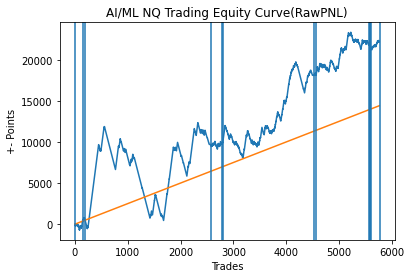

In [65]:

# TOTAL EQUITY CURVE

import matplotlib.pyplot as plt

# print(mtt[list(mtt.keys())[6]])

# ecs = [w0, w1, w3, w4, w5, w6, w7]
# ecs = [wt6, wt5, wt4, wt3, wt2, wt1, w0, w1, w2, w3, w4, w5, w6, w7] # wt2, wt1,  , w2, w3
# ecs = bump1.copy()
# ecs = ecs[:5] + ecs[6:]
# ecs.pop(2)
# ecs.pop(7)
# ecs.pop(4)
# ecs = [dl[6]]
ys = [0]
splits = [0]
peak = 0
max_dd = 0
for i in range(len(ecs)):
    # print(len(ecs[i]))
    splits.append(splits[-1] + len(ecs[i]) + 1)
    # print(splits)
    # ys = ys + [ecs[i][j] + ys[-1] for j in range(len(ecs[i]))]
    yn1 = ys[-1]
    for j in range(len(ecs[i])):
        ys.append(ecs[i][j] + yn1)
        peak = max(peak, ecs[i][j] + yn1)
        max_dd = max(max_dd, peak - (ecs[i][j] + yn1))
        # if ecs[i][j] >= 250 or ecs[i][j] <= -150 or j == 50: # or ecs[i][j] <= 150
            # splits.append(j + splits[-1])
        #     break

print("MAX DD: ", max_dd)
print("Total Trades: ", len(ys))

xs = [x for x in range(len(ys))]
fees = [2.5 * x for x in range(len(ys))]

plt.title("AI/ML NQ Trading Equity Curve(RawPNL)")
plt.xlabel("Trades")
plt.ylabel("+- Points")
plt.plot(xs, ys, label = "+- Points")
plt.plot(xs, fees, label = "Fees")
xcnt = 0
for i in splits:
    xcnt += i
    plt.axvline(x = i)

plt.show()
# Make sure to close the plt object once done
plt.close()

MAX DD:  1725
Total Trades:  1017
Green Weeks:  0
Red Weeks:  1
Max Trades:  0
Max Trailing DD:  2
END OF WEEK(green, red):  6 3
['END OF WEEK', 'END OF WEEK', 'RED', 'END OF WEEK', 'END OF WEEK', 'MAX_TRAILING_DD', 'END OF WEEK', 'MAX_TRAILING_DD', 'END OF WEEK', 'END OF WEEK', 'END OF WEEK', 'END OF WEEK']
[0.9937106918238994, 0.9565217391304348, 0.01631116687578419, 0.9953271028037384, 0.6666666666666666, 0.05973578403216542, 0.9565217391304348, 0.24629080118694363, 0.875, 0.9, 0.8, 0.9943181818181818]
MAX DD:  1944
Final P/L(no fees) 1775
Final P/L(inculding fees) 759
Total Trades:  1017


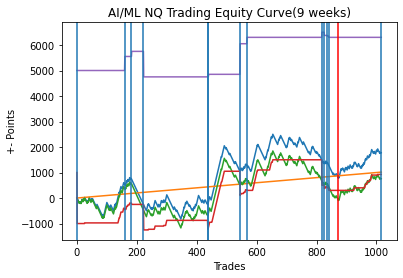

In [66]:
# ecs = [wt5, wt4, wt3, wt2, wt1, w0, w1, w2, w3, w4, w5, w6, w7]
# ecs = [w4, w5, w6, w7]

ys = [0]
splits = [0]
peak = 0
max_dd = 0
green_weeks = 0
red_weeks = 0
max_trades = 0
max_trailing_dd = 0
eowg = 0
eowr = 0
weeklyresults = []

mtp = 5000
msl = 1000
mmdd = 1000
mtrades = 1000

trailing_dd_d = [mmdd]
tp_d = [mtp]
weekly_ranges = []

for i in range(len(ecs)):
    added = False
    # ys = ys + [ecs[i][j] + ys[-1] for j in range(len(ecs[i]))]
    yn1 = ys[-1]
    mod_dd = 0
    mod_peak = ys[-1]
    pc = 0
    for j in range(len(ecs[i])):
        ys.append(ecs[i][j] + yn1)
        peak = max(peak, ecs[i][j] + yn1)
        max_dd = max(max_dd, peak - (ecs[i][j] + yn1))
        mod_peak = max(mod_peak, ecs[i][j] + yn1)
        mod_dd = max(mod_dd, mod_peak - (ecs[i][j] + yn1))
        trailing_dd_d.append(mod_peak - mmdd)
        tp_d.append(yn1 + mtp)


        if ecs[i][j] >= mtp or ecs[i][j] <= -msl or j == mtrades or mod_dd >= mmdd: # or ecs[i][j] <= 150
            weekly_ranges.append(j / len(ecs[i]))
            splits.append(j + splits[-1] + 1)
            added = True
            if ecs[i][j] >= mtp:
                green_weeks += 1
                weeklyresults.append("GREEN")
            elif ecs[i][j] <= -msl:
                red_weeks += 1
                weeklyresults.append("RED")
            elif mod_dd >= mmdd:
                max_trailing_dd += 1
                weeklyresults.append("MAX_TRAILING_DD")
            else:
                max_trades += 1
                weeklyresults.append("MAX_TRADES")
            break
    
    if not added and len(ecs[i]) != 0:
        weekly_ranges.append(j / len(ecs[i]))
        splits.append(j + splits[-1] + 1)
        if ecs[i][-1] > 0:
            eowg += 1
        else:
            eowr += 1
        weeklyresults.append("END OF WEEK")

print("MAX DD: ", max_dd)
print("Total Trades: ", len(ys))
print("Green Weeks: ", green_weeks)
print("Red Weeks: ", red_weeks)
print("Max Trades: ", max_trades)
print("Max Trailing DD: ", max_trailing_dd)
print("END OF WEEK(green, red): ", eowg, eowr)


print(weeklyresults)
print(weekly_ranges)

xs = [x for x in range(len(ys))]
fees = [x for x in range(len(ys))]
xmf = ys.copy()
peak = 0
max_dd = 0
mddx = 0

for i in range(len(fees)):
    xmf[i] -= fees[i]
    peak = max(peak, xmf[i])
    if peak - xmf[i] > max_dd:
        mddx = i
    max_dd = max(max_dd, peak - xmf[i])


print("MAX DD: ", max_dd)
print("Final P/L(no fees)", ys[-1])
print("Final P/L(inculding fees)", xmf[-1])
print("Total Trades: ", len(ys))

plt.title("AI/ML NQ Trading Equity Curve(9 weeks)")
plt.xlabel("Trades")
plt.ylabel("+- Points")
plt.plot(xs, ys, label = "+- Points")
plt.plot(xs, fees, label = "Fees")
plt.plot(xs, xmf, label = "Net Points")

plt.plot(xs, trailing_dd_d)
plt.plot(xs, tp_d)

xcnt = 0
for x in range(len(splits)):
    i = splits[x]
    xcnt += i
    plt.axvline(x = i)

plt.axvline(x = mddx, color = 'red')


plt.show()
# Make sure to close the plt object once done
